In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
%matplotlib inline

In [29]:
df = pd.read_csv('workout_list.csv')

In [3]:
df.head()

,date,log_id,exercise_id,exercise_name,set_number,weight,rep
0,2016-03-04,1,2,Barbell Bench Press,1,150.0,10
1,2016-03-04,1,2,Barbell Bench Press,2,150.0,10
2,2016-03-04,1,2,Barbell Bench Press,3,150.0,10
3,2016-03-04,2,10,Barbell Shoulder Press,1,95.0,10
4,2016-03-04,2,10,Barbell Shoulder Press,2,85.0,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13098 entries, 0 to 13097
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13098 non-null  object 
 1   log_id         13098 non-null  int64  
 2   exercise_id    13098 non-null  int64  
 3   exercise_name  13098 non-null  object 
 4   set_number     13098 non-null  int64  
 5   weight         13098 non-null  float64
 6   rep            13098 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 716.4+ KB


In [9]:
df.isna().sum()

date             0
log_id           0
exercise_id      0
exercise_name    0
set_number       0
weight           0
rep              0
dtype: int64

In [10]:
df.describe()

,log_id,exercise_id,set_number,weight,rep
count,13098.000000,13098.000000,13098.000000,13098.000000,13098.000000
mean,2038.719805,134.556726,2.368835,140.519316,7.994961
std,1138.915254,174.019432,1.173606,90.188816,2.503226
min,1.000000,2.000000,1.000000,1.000000,0.000000
25%,1062.000000,12.000000,1.000000,55.000000,5.000000
50%,2064.500000,93.000000,2.000000,130.000000,10.000000
75%,3034.750000,159.000000,3.000000,210.000000,10.000000
max,3916.000000,954.000000,10.000000,405.000000,20.000000


In [11]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13098 entries, 0 to 13097
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13098 non-null  datetime64[ns]
 1   log_id         13098 non-null  int64         
 2   exercise_id    13098 non-null  int64         
 3   exercise_name  13098 non-null  object        
 4   set_number     13098 non-null  int64         
 5   weight         13098 non-null  float64       
 6   rep            13098 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 716.4+ KB


In [17]:
df.nunique()

date              760
log_id           3707
exercise_id        42
exercise_name      42
set_number         10
weight             86
rep                16
dtype: int64

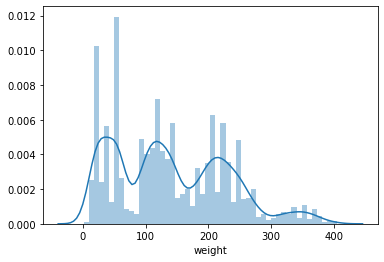

In [22]:
sns.distplot(df['weight'], bins=50)

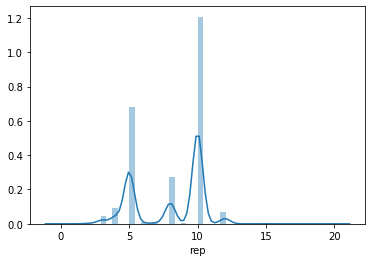

In [23]:
sns.distplot(df['rep'])

In [32]:
def calc_1rm(weight, rep):
    return weight*(1+(rep/30))

In [33]:
# 1rm Max = ((weight X reps) X 0.0333) + weight
df['1rm'] = df.apply(lambda x: calc_1rm(x.weight, x.rep), axis=1)

In [36]:
df.head(10)

,date,log_id,exercise_id,exercise_name,set_number,weight,rep,1rm
0,2016-03-04,1,2,Barbell Bench Press,1,150.0,10,200.000000
1,2016-03-04,1,2,Barbell Bench Press,2,150.0,10,200.000000
2,2016-03-04,1,2,Barbell Bench Press,3,150.0,10,200.000000
3,2016-03-04,2,10,Barbell Shoulder Press,1,95.0,10,126.666667
4,2016-03-04,2,10,Barbell Shoulder Press,2,85.0,10,113.333333
5,2016-03-04,3,100,Dumbbell Bicep Curl,1,30.0,10,40.000000
6,2016-03-04,3,100,Dumbbell Bicep Curl,2,30.0,10,40.000000
7,2016-03-04,4,3,Barbell Bent Over Row,1,155.0,10,206.666667
8,2016-03-04,4,3,Barbell Bent Over Row,2,155.0,10,206.666667
9,2016-03-04,5,247,Dumbbell Standing Triceps Extension,1,50.0,10,66.666667


In [46]:
df_bench = df[df['exercise_name'] == 'Barbell Bench Press']

In [56]:
df_bench.head(20)

,date,log_id,exercise_id,exercise_name,set_number,weight,rep,1rm
0,2016-03-04,1,2,Barbell Bench Press,1,150.0,10,200.000000
1,2016-03-04,1,2,Barbell Bench Press,2,150.0,10,200.000000
2,2016-03-04,1,2,Barbell Bench Press,3,150.0,10,200.000000
11,2016-03-07,6,2,Barbell Bench Press,1,150.0,10,200.000000
12,2016-03-07,6,2,Barbell Bench Press,2,150.0,10,200.000000
13,2016-03-07,6,2,Barbell Bench Press,3,150.0,7,185.000000
32,2016-03-09,16,2,Barbell Bench Press,1,150.0,10,200.000000
33,2016-03-09,16,2,Barbell Bench Press,2,150.0,10,200.000000
34,2016-03-09,16,2,Barbell Bench Press,3,150.0,10,200.000000
57,2016-03-11,25,2,Barbell Bench Press,1,155.0,10,206.666667


In [57]:
df_bench_mean = df_bench.groupby('date')['1rm'].mean()

Text(0, 0.5, 'Calculated 1 Rep Max')

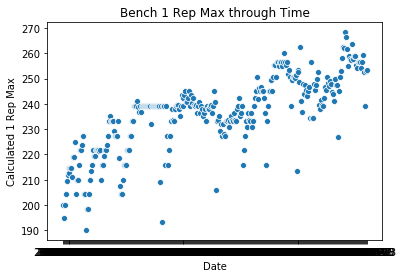

In [66]:
sns.scatterplot(df_bench_mean.index, df_bench_mean.values)
plt.title('Bench 1 Rep Max through Time')
plt.xlabel('Date')
plt.ylabel('Calculated 1 Rep Max')

In [71]:
df_squat = df[df['exercise_name'] == 'Barbell Squat']

In [72]:
df_squat_mean = df_squat.groupby('date')['1rm'].mean()

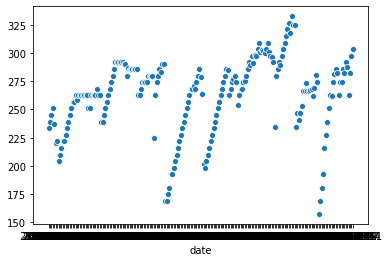

In [73]:
sns.scatterplot(df_squat_mean.index, df_squat_mean.values)